<a href="https://colab.research.google.com/github/erwincoumans/tinyrenderer/blob/master/pytinyrenderer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# see also https://github.com/erwincoumans/tinyrenderer

!pip3 install pytinyrenderer --upgrade
!pip3 install numpngw

     |████████████████████████████████| 1.2 MB 18.0 MB/s 


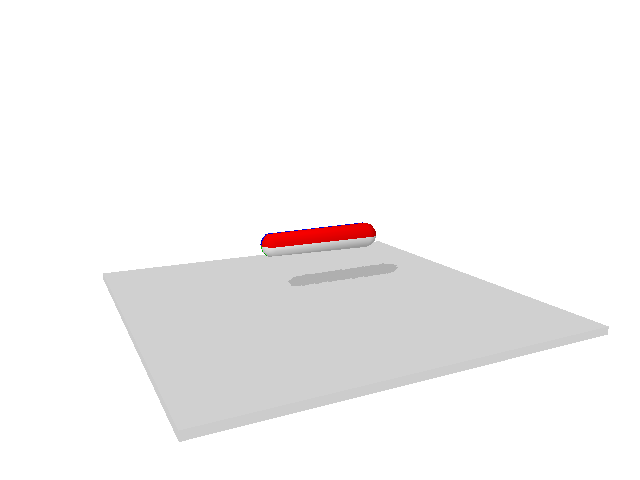

In [ ]:
import pytinyrenderer
import math

#only used for showing the image
import numpy as np
from IPython.display import Image
from numpngw import write_apng


scene = pytinyrenderer.TinySceneRenderer()

class TextureRGB888:
  def __init__(self):
    self.pixels = [
            255,255,255,#white
            255,0,0,
            0,255,0,
            0,0,255]
    self.width = 2
    self.height= 2


texture = TextureRGB888()

capx_model = scene.create_capsule(0.1,0.4,0, texture.pixels, texture.width, texture.height)
capy_model = scene.create_capsule(0.1,0.4,1, texture.pixels, texture.width, texture.height)
capz_model = scene.create_capsule(0.1,0.4,2, texture.pixels, texture.width, texture.height)

cube_model = scene.create_cube([1.5,1.5,0.03], texture.pixels, 1,1, 16.)
cube_instance = scene.create_object_instance(cube_model)
scene.set_object_position(cube_instance, [0,0,-0.5])

width = 640
height = 480
eye = [2., 4., 1.]
target = [0., 0., 0.]
light = pytinyrenderer.TinyRenderLight()
camera = pytinyrenderer.TinyRenderCamera(viewWidth=width, viewHeight=height,
                                          position=eye, target=target)

capsulex_instance = scene.create_object_instance(capx_model)
capsuley_instance = scene.create_object_instance(capy_model)
capsulez_instance = scene.create_object_instance(capz_model)

images=[]

img = scene.get_camera_image([cube_instance, capsulex_instance], light, camera)
rgb_array = np.reshape(np.array(img.rgb,dtype=np.uint8), (img.height, img.width, -1))
images.append(rgb_array)

img = scene.get_camera_image([cube_instance, capsulex_instance,capsuley_instance], light, camera)
rgb_array = np.reshape(np.array(img.rgb,dtype=np.uint8), (img.height, img.width, -1))
images.append(rgb_array)

img = scene.get_camera_image([cube_instance, capsulex_instance,capsuley_instance,capsulez_instance],  light, camera)
rgb_array = np.reshape(np.array(img.rgb,dtype=np.uint8), (img.height, img.width, -1))
images.append(rgb_array)

img = scene.get_camera_image([cube_instance, capsulex_instance,capsuley_instance,capsulez_instance],  light, camera)
rgb_array = np.reshape(np.array(img.rgb,dtype=np.uint8), (img.height, img.width, -1))
images.append(rgb_array)

write_apng('tinyanim2_tds.png', images, delay=500)
Image(filename='tinyanim2_tds.png')


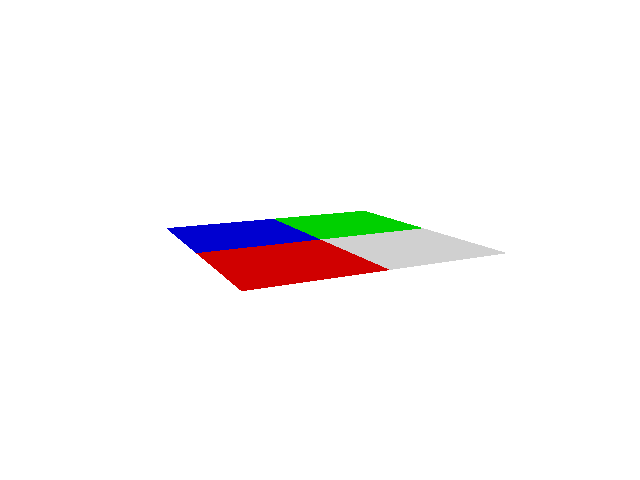

In [ ]:


vertices =np.array([[100.000000, -100.000000, 0.000000],
            [100.000000, 100.000000, 0.000000],
            [-100.000000, 100.000000, 0.000000],
            [-100.000000,  -100.000000, 0.000000]])#.flatten().tolist()
vertices *= 0.01
normals = np.array([[0.000000, 0.000000, 1.000000], [0.000000, 0.000000, 1.000000],
           [0.000000, 0.000000, 1.000000], [0.000000, 0.000000, 1.000000]])#.flatten().tolist()

uvs = np.array([[1.000000, 0.000000], [1.000000, 1.000000],
 [0.000000, 1.000000], [0.000000, 0.000000]])#.flatten().tolist()

indices = [
    0,   1,    2,
    0,    2,    3]

plane_model = scene.create_mesh(vertices.flatten().tolist(), normals.flatten().tolist(), uvs.flatten().tolist(), indices, texture.pixels, texture.width, texture.height, 1.)

plane_instance = scene.create_object_instance(plane_model)
#scene.set_object_position(plane_instance,[-10,-2,-131])
scene.set_object_orientation(plane_instance,[0,0,0,1])
#scene.set_object_local_scaling(plane_instance,[0.01,0.01,0.01])

img = scene.get_camera_image([plane_instance], light, camera)
rgb_array = np.reshape(np.array(img.rgb,dtype=np.uint8), (img.height, img.width, -1))

images = []
images.append(rgb_array)
write_apng('tiny_plane2.png', images, delay=500)
Image(filename='tiny_plane2.png')